# Tutorial for PyDrugLogics


This tutorial demonstrates the use of PyDruglogics for optimizing of Boolean Models and predict drug synergy effects.
The PyDruglogics pipeline implementation on based on: [Å. Flobak, J. Zobolas (2023): Fine tuning a logical model of cancer cells to predict drug synergies: combining manual curation and automated parameterization](https://www.frontiersin.org/journals/systems-biology/articles/10.3389/fsysb.2023.1252961/full).

More information about the package on [GitHub](https://github.com/druglogics/pydruglogics).

### Core Features
- Construct Boolean model from `.sif` file
- Load Boolean model from `.bnet` file
- Optimize Boolean model
- Generate perturbed models
- Evaluate drug synergies


## Initialization, loading files

The parameters and the initialization of the pipeline are summarized in this section. These are the neccesary components for constructing, training, and applying predictive models effectively.

In [1]:
import pydruglogics

In [2]:
from pydruglogics.model.BooleanModel import BooleanModel
from pydruglogics.model.InteractionModel import InteractionModel
from pydruglogics.input.ModelOutputs import ModelOutputs
from pydruglogics.input.TrainingData import TrainingData
from pydruglogics.input.Perturbations import Perturbation

#### Model Outputs
Defines the network nodes and their respective weights used to calculate a global output response for the Boolean Model. \
**Initialization:**
1. **From a File**: Load target states from a file that specifies node-state pairs.
2. **From a Dictionary**: Define directly using a dictionary where each key-value pair represents a node and its integer weight.

In [3]:
model_outputs_dict = {
        "RSK_f": 1.0,
        "MYC": 1.0,
        "TCF7_f": 1.0,
        "CASP8": -1.0,
        "CASP9": -1.0,
        "FOXO_f": -1.0
    }
model_outputs = ModelOutputs(input_dictionary=model_outputs_dict)

2024-12-05 23:41:39,560 - INFO - Model outputs are initialized from dictionary.


In [4]:
model_outputs.print()

Model output: RSK_f, weight: 1.0
Model output: MYC, weight: 1.0
Model output: TCF7_f, weight: 1.0
Model output: CASP8, weight: -1.0
Model output: CASP9, weight: -1.0
Model output: FOXO_f, weight: -1.0


#### Training Data
Inclues condition-response pairs (observations) and a weight number used to calculate the weighted average fitness of the Boolean Models.\
**Initialization:**

1. **From a File**: Load target states from a structured file.

In [5]:
training_data_file = 'training'
training_data = TrainingData(input_file=training_data_file)

2024-12-05 23:41:39,585 - INFO - Training data loaded from file: training.


2. **From a Dictionary**: Define directly using a dictionary.

In [6]:
 observations = [(["CASP3:0", "CASP8:0","CASP9:0","FOXO_f:0","RSK_f:1","CCND1:1",
                      "MYC:1","RAC_f:1","JNK_f:0","MAPK14:0","AKT_f:1","MMP_f:1",
                      "PTEN:0","ERK_f:1","KRAS:1","PIK3CA:1","S6K_f:1","GSK3_f:0",
                      "TP53:0","BAX:0","BCL2:1","CTNNB1:1","TCF7_f:1","NFKB_f:1"], 1.0)]

In [7]:
training_data = TrainingData(observations=observations)

2024-12-05 23:41:39,606 - INFO - Training data initialized from list.


In [8]:
training_data.print()

Observation:
Condition: -
Response: CASP3:0, CASP8:0, CASP9:0, FOXO_f:0, RSK_f:1, CCND1:1, MYC:1, RAC_f:1, JNK_f:0, MAPK14:0, AKT_f:1, MMP_f:1, PTEN:0, ERK_f:1, KRAS:1, PIK3CA:1, S6K_f:1, GSK3_f:0, TP53:0, BAX:0, BCL2:1, CTNNB1:1, TCF7_f:1, NFKB_f:1
Weight: 1.0



#### Perturbations
Defines the drugs and the perturbations applied to the Boolean Models, affecting the nodes in the network.

Initialization **From Dictionary**:
1. **Define** a `drug_data` **and** `perturbation_data`: Provide a list of drugs with their name, targets, and effect (Options:  `inhibits` (default) or `activates`). Specify a list of perturbations, where each entry is a drug combination.

3. **Define only** `drug_data`: If no `perturbation_data` is given, perturbations will be generated automatically by creating all possible single-drug and two-drug combinations from the drug panel.

In [9]:
 drug_data = [
        ['PI', 'PIK3CA', 'inhibits'],
        ['PD', 'MEK_f'],
        ['CT','GSK3_f'],
        ['BI', 'MAPK14'],
        ['PK', 'CTNNB1'],
        ['AK', 'AKT_f'],
        ['5Z', 'MAP3K7']
    ]

**Note**: The `perturbation_data` is **optional**. If only the `drug_data` is given, all perturbations are calculated.

In [10]:
perturbation_data = [
        ['PI'],
        ['PD'],
        ['CT'],
        ['BI'],
        ['PK'],
        ['AK'],
        ['5Z'],
        ['PI', 'PD'],
        ['PI', 'CT'],
        ['PI', 'BI'],
        ['PI', 'PK'],
        ['PI', 'AK'],
        ['PI', '5Z'],
        ['PD', 'CT'],
        ['PD', 'BI'],
        ['PD', 'PK'],
        ['PD', 'AK'],
        ['PD', '5Z'],
        ['CT', 'BI'],
        ['CT', 'PK'],
        ['CT', 'AK'],
        ['CT', '5Z'],
        ['BI', 'PK'],
        ['BI', 'AK'],
        ['BI', '5Z'],
        ['PK', 'AK'],
        ['PK', '5Z'],
        ['AK', '5Z']]

In [11]:
perturbations = Perturbation(drug_data=drug_data, perturbation_data=perturbation_data)

2024-12-05 23:41:39,655 - INFO - Drug panel data initialized from list.
2024-12-05 23:41:39,655 - INFO - Drug perturbations initialized.


In [12]:
perturbations.print()

[PI (targets: PIK3CA)]
[PD (targets: MEK_f)]
[CT (targets: GSK3_f)]
[BI (targets: MAPK14)]
[PK (targets: CTNNB1)]
[AK (targets: AKT_f)]
[5Z (targets: MAP3K7)]
[PI (targets: PIK3CA), PD (targets: MEK_f)]
[PI (targets: PIK3CA), CT (targets: GSK3_f)]
[PI (targets: PIK3CA), BI (targets: MAPK14)]
[PI (targets: PIK3CA), PK (targets: CTNNB1)]
[PI (targets: PIK3CA), AK (targets: AKT_f)]
[PI (targets: PIK3CA), 5Z (targets: MAP3K7)]
[PD (targets: MEK_f), CT (targets: GSK3_f)]
[PD (targets: MEK_f), BI (targets: MAPK14)]
[PD (targets: MEK_f), PK (targets: CTNNB1)]
[PD (targets: MEK_f), AK (targets: AKT_f)]
[PD (targets: MEK_f), 5Z (targets: MAP3K7)]
[CT (targets: GSK3_f), BI (targets: MAPK14)]
[CT (targets: GSK3_f), PK (targets: CTNNB1)]
[CT (targets: GSK3_f), AK (targets: AKT_f)]
[CT (targets: GSK3_f), 5Z (targets: MAP3K7)]
[BI (targets: MAPK14), PK (targets: CTNNB1)]
[BI (targets: MAPK14), AK (targets: AKT_f)]
[BI (targets: MAPK14), 5Z (targets: MAP3K7)]
[PK (targets: CTNNB1), AK (targets: AKT_f

### Initialize Boolean Model
A `BooleanModel` defines the network and logical rules for node interactions, used for generating predictions and simulations.\
There are **two ways** for the initialization:

#### Initialize Boolean Model from `.sif` file

##### Creating an `InteractionModel`, that can be initialized:
  - `interaction_file` (required): The path to the `.sif` file.
    
  - `model_name`: name of the model, by default the `.sif` file name will be set.

  - `remove_self_regulated_interactions`: Remove self regulated interactions. The default is `False`.

  - `remove_inputs`: Trim inputs from the model. The deafult is `False`.

  - `remove_outputs`: Trim ouputs from the model. The default is `False`.
##### Creating a `BooleanModel`, that can be initialized:
  - `model` (required): Interaction Model

  - `model_name`: The name of the model, by default the `.sif` file name will be set.

  - `mutation_type`: There are 3 options: `topology`, `mixed`, `balanced`. The default is `balanced`.

  - `attractor_tool`: There are 2 options: `mpbn` or `pyboolnet` The default is `mpbn`. More infotmation [here](https://mpbn.readthedocs.io/) about MPBN (Most Permissive Boolean Networks) and more information [here](https://pyboolnet.readthedocs.io/en/master/) about PyBoolNet.

  - `attractor_type`: There are 2 options: `stable_states` or `trapspaces`. The default is `stable_states`.


In [13]:
network_sif = 'network.sif'
model = InteractionModel(interactions_file=network_sif)
model.print()

2024-12-05 23:41:39,678 - INFO - Interactions loaded successfully
Target: Antisurvival, activating regulators: FOXO_f, CASP3
Target: CASP3, activating regulators: CASP8, CASP9
Target: FOXO_f, inhibitory regulators: NLK, AKT_f
Target: Prosurvival, activating regulators: CCND1, MYC
Target: CCND1, activating regulators: TCF7_f, RSK_f
Target: MYC, activating regulators: TCF7_f
Target: RAC_f, activating regulators: mTORC2_c, DVL_f
Target: mTORC2_c, activating regulators: TSC_f, inhibitory regulators: S6K_f
Target: DVL_f, activating regulators: FZD_f
Target: MAP3K4, activating regulators: RAC_f
Target: MAP3K11, activating regulators: RAC_f
Target: MAP2K4, activating regulators: MAP3K4, MAP3K11, GRAP2, MAP3K7
Target: MAP3K7, activating regulators: TAB_f
Target: GRAP2, inhibitory regulators: MAPK14
Target: MAP2K7, activating regulators: GRAP2, MAP3K7
Target: JNK_f, activating regulators: MAP2K7, MAP2K4, inhibitory regulators: DUSP1
Target: DUSP1, activating regulators: MSK_f, MAPK14
Target: MA

In [14]:
boolean_model_sif = BooleanModel(model=model, model_name='test1',
                                     mutation_type='balanced', attractor_tool='mpbn', attractor_type='stable_states')

2024-12-05 23:41:39,693 - INFO - Boolean Model from Interaction Model is created.


In [15]:
boolean_model_sif.print()

Antisurvival *= (FOXO_f or CASP3)
CASP3 *= (CASP8 or CASP9)
FOXO_f *= not (NLK or AKT_f)
Prosurvival *= (CCND1 or MYC)
CCND1 *= (TCF7_f or RSK_f)
MYC *= (TCF7_f)
RAC_f *= (mTORC2_c or DVL_f)
mTORC2_c *= (TSC_f) and not (S6K_f)
DVL_f *= (FZD_f)
MAP3K4 *= (RAC_f)
MAP3K11 *= (RAC_f)
MAP2K4 *= (MAP3K4 or MAP3K11 or GRAP2 or MAP3K7)
MAP3K7 *= (TAB_f)
GRAP2 *= not (MAPK14)
MAP2K7 *= (GRAP2 or MAP3K7)
JNK_f *= (MAP2K7 or MAP2K4) and not (DUSP1)
DUSP1 *= (MSK_f or MAPK14)
MAPK14 *= (MAP2K3 or MAP2K4) and not (DUSP1)
MAP2K3 *= (MAP3K5 or MAP3K7)
MAP3K5 *= not (AKT_f)
AKT_f *= (mTORC2_c or PDPK1)
TAB_f *= not (MAPK14)
MSK_f *= (ERK_f or MAPK14)
RTPK_f *= (MMP_f or RTPK_g) and not (MEK_f or MAPK14)
RTPK_g *= (FOXO_f)
MEK_f *= (RAF_f or MAP3K8) and not (ERK_f)
SHC1 *= (RTPK_f) and not (PTEN)
PTEN *= (PTEN_g) and not (GSK3_f)
GRB2 *= (SHC1)
SOS1 *= (GRB2) and not (ERK_f)
ERK_f *= (MEK_f) and not (DUSP6)
KRAS *= (PTPN11 or SOS1)
PTPN11 *= (GAB_f)
RAF_f *= (KRAS) and not (RHEB or ERK_f or AKT_f)
RHEB

#### Initialize Boolean Model from `.bnet` file

See more about the BoolNet format: [CoLoMoTo formats](http://colomoto.org/biolqm/doc/format-bnet.html) and [PyBoolNet Docs](https://pyboolnet.readthedocs.io/en/master/quickstart.html).

**Creating a `BooleanModel`, that can be initialized:**
  - `file` (required): The path to the `.bnet` file.
    
  - `model_name`: The name of the model.

  - `mutation_type`: There are 3 options: `topology`, `mixed`, `balanced`. The default is balanced.

  - `attractor_tool`: There are 2 options: `mpbn` or `pyboolnet` The default is `mpbn`.

  - `attractor_type`:There are 2 options: `stable_states` or `trapspaces`. The default is `stable_states`.

In [16]:
equations_bnet = 'network.bnet'
boolean_model_bnet = BooleanModel(file=equations_bnet, model_name='test2',
                                     mutation_type='balanced', attractor_tool='mpbn', attractor_type='trapspaces')

2024-12-05 23:41:39,714 - INFO - Boolean Model from .bnet file is created.


## Run Train and Predict with `executor`

**Required Parameters:**
- `BooleanModel`,
- `ModelOutputs`,
- `Perturbations`
- Genetic Algorithm Arguments (`ga_args`)
- Evolution Arguments (`ev_args`)
- Observed Synergy Scores (`observed_synergy_scores`)

**Optional Parameters:**
- `Training Data`

### Initialize Train and Predict

To run training and prediction, have to set up `train_params` and `predict_params`, which define how the executor handles model training and simulations. Below, you can see how to initialize these parameters.



#### 1. `train_params`
This dictionary holds the configuration and input data necessary for training Boolean Models.\
Below is a detailed overview of its parameters:

- `boolean_model`: The initial `BooleanModel` instance that serves as the starting point for training.


- `model_outputs`: An instance of `ModelOutputs`.

- `training_data` (optional): An instance of `TrainingData`.

- `ga_args`: A dictionary of arguments and configurations for the genetic algorithm.

- `ev_args`: A dictionary of arguments for the evolutionary strategy settings. It runs multiple times the genetic algorithm.

- `save_best_models` (optional): Whether to save the models with the best fitness score to disk. By defult, `False`.
  

- `save_path` (optional): The path where the best models will be saved if `save_best_models` is `True`. (e.g. `'./models'`).

##### Arguments for the Genetic Algorithm (`ga_args`)
The Evolution pipeline uses the `PyGAD` Genetic Algoritm . For more information about the `PyGAD.GA` initialization click [here](https://pygad.readthedocs.io/en/latest/pygad.html#init) .

In [17]:
ga_args = {
        'num_generations': 20,
        'num_parents_mating': 3,
        'mutation_num_genes': 8,
        'fitness_batch_size': 20,   # should be the same number as the num_generations
        'crossover_type': 'single_point',
        'mutation_type': 'random',
        'keep_elitism': 6,
        # 'stop_criteria': 'reach_95'
}

##### Arguments for the Evolution (`ev_args`)
- `num_best_solutions`: Number of the best solutions per Evolution run.
  
- `num_of_runs`: Number of running the Evolution
  
- `num_of_cores`: Maximum number of cores for calculations
  
- `num_of_init_mutation`: Number of mutated genes in the initial population.

In [18]:
ev_args = {
        'num_best_solutions': 3,
        'num_of_runs': 50,
        'num_of_cores': 4,
        'num_of_init_mutation': 20
}

##### Init `train_params`

In [19]:
train_params = {
        'boolean_model': boolean_model_bnet,
        'model_outputs': model_outputs,
        'training_data': training_data,
        'ga_args': ga_args,
        'ev_args': ev_args,
        'save_best_models': False,
        # 'save_path': './models'
}

#### 2. `predict_params`
This dictionary holds the necessary configurations for the `predict` function, which simulates perturbed models and predicts drug synergies.\
Below is a detailed overview of its parameters:

- `perturbations`: An instance of `Perturbation`.

- `model_outputs`: An instance of `ModelOutputs`.

- `observed_synergy_scores`: A list of observed synergy scores used to plot and evaluate the predictive accuracy of the models.

- `synergy_method`: The method used to calculate synergy scores. Options: `'bliss'` (Bliss Independence) or `'hsa'` (Highest Single Agent). By default, `'bliss'`

- `run_parallel` (optional): Whether to run it paralelly or serially, By default, `True`.

- `plot_roc_pr_curves` (optional): Whether to plot the ROC and PR Curves when the predction finishes. By default, `True`.

- `save_predictions` (optional):  Whether to save the predictions to disk after the simulations. By default, `False`.

- `save_path` (optional): Specifies the path to save the predictions if `save_predictions` is `True` (e.g. `'./predictions'`).


- **For running only predict on previously trained models from disk:**
   - `model_directory`: Path to a directory containing pre-trained models to be loaded if `best_boolean_models` is not provided.(e.g., `'./models/models_2024_11_06_1130'`).

   - `attractor_tool`: Specifies the tool used for attractor computation if the models are loaded from `model_directory` (e.g. `'mpbn'`).


   - `attractor_type`: Specifies the tool used for attractor computation if the models are loaded from `model_directory` (e.g. `'stable_states'`).
 
   -   `cores`: Number of CPU cores to use for parallel processing.(e.g. `4` for using four CPU cores).

- **For running only predict on previously trained models during runtime:**

   - `best_boolean_models`: retults of train (e.g. models = train(boolean_model=boolean_model_bnet, model_outputs=model_outputs, training_data=training_data, ga_args=ga_args, ev_args=ev_args)
  
   -   `cores`: Number of CPU cores to use for parallel processing.(e.g. `4` for using four CPU cores).

#####   Observed Synergy Scores
List of observed synergy scores corresponding to the perturbations applied, used to evaluate model predictions. \
**Initialization**: From a list containing observed synergy scores.

In [20]:
observed_synergy_scores = ["PI-PD", "PI-5Z", "PD-AK", "AK-5Z"]

##### Init `predict_param`

In [21]:
predict_params = {
        'perturbations': perturbations,
        'model_outputs': model_outputs,
        'observed_synergy_scores': observed_synergy_scores,
        'synergy_method': 'bliss',
        'plot_roc_pr_curves': True,
        'save_predictions': False,
        # 'cores':3,
        # 'save_path': './predictions',
        # 'model_directory': './models/example_models',
        # 'attractor_tool': 'mpbn',
        # 'attractor_type':  'stable_states'
    }

### Run Train and Predict

In [22]:
from pydruglogics.execution.Executor import execute, train, predict

2024-12-05 23:41:39,787 - INFO - Train started...
2024-12-05 23:41:48,221 - INFO - Training finished.
2024-12-05 23:41:48,222 - INFO - Train completed in 8.44 seconds.
2024-12-05 23:41:48,223 - INFO - Predict started...
2024-12-05 23:42:00,944 - INFO - 
Synergy scores (bliss):
2024-12-05 23:42:00,945 - INFO - PI-PD: -0.08418595679012342
2024-12-05 23:42:00,946 - INFO - PI-CT: 0.002967592592592605
2024-12-05 23:42:00,947 - INFO - PI-BI: 0.02335030864197518
2024-12-05 23:42:00,947 - INFO - PI-PK: 0.020891203703703565
2024-12-05 23:42:00,947 - INFO - PI-AK: 0.06716280864197521
2024-12-05 23:42:00,948 - INFO - PI-5Z: -0.036652777777777645
2024-12-05 23:42:00,948 - INFO - PD-CT: 0.0032314814814814463
2024-12-05 23:42:00,949 - INFO - PD-BI: 0.0024660493827158847
2024-12-05 23:42:00,949 - INFO - PD-PK: 0.1255787037037036
2024-12-05 23:42:00,949 - INFO - PD-AK: -0.043075617283950596
2024-12-05 23:42:00,950 - INFO - PD-5Z: 0.00913888888888903
2024-12-05 23:42:00,950 - INFO - CT-BI: -5.925925925

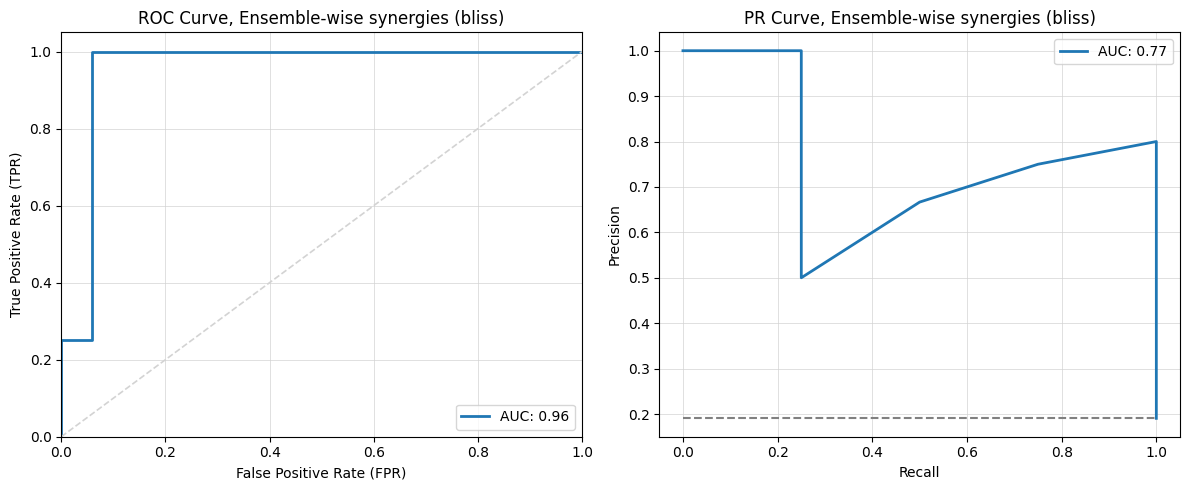

2024-12-05 23:42:01,167 - INFO - Predict completed in 12.94 seconds.
2024-12-05 23:42:01,168 - INFO - Total runtime for training and prediction: 21.38 seconds


In [23]:
execute(train_params=train_params, predict_params=predict_params)

Alternatively, `train` and `predict` can be run separately: 

In [24]:
# execute(train_params=train_params)

**Note:** If you would like to run the `predict` process but the `train` process has not been previously executed, it is necessary to load the Boolean Models from a `.bnet` file and add the path to the `model_directory`. In this case `attractor_tool` and `attractor_type` must be provided.

## Run Statistics

#### Train Boolean Models

Boolean Models calibrated to steady state response.

In [25]:
best_boolean_models_calibrated = train(boolean_model=boolean_model_bnet, model_outputs=model_outputs, training_data=training_data,
                                ga_args=ga_args, ev_args=ev_args)

2024-12-05 23:42:01,187 - INFO - Train started...
2024-12-05 23:42:09,851 - INFO - Training finished.
2024-12-05 23:42:09,852 - INFO - Train completed in 8.66 seconds.


Boolean Models match to proliferation profile.

In [26]:
best_boolean_models_random = train(boolean_model=boolean_model_bnet, model_outputs=model_outputs, ga_args=ga_args, ev_args=ev_args)

2024-12-05 23:42:09,860 - INFO - Train started...
2024-12-05 23:42:09,861 - INFO - Training data initialized from list.
2024-12-05 23:42:12,241 - INFO - Training finished.
2024-12-05 23:42:12,242 - INFO - Train completed in 2.38 seconds.


### Compare Boolean Models trained by calibrated and random data

The `compare_two_simulations` function compares the predictive performance of two sets of evolved Boolean models by plotting ROC and PR curves. 
#### Parameters:

- `boolean_models1`: A list of the best Boolean models from the first run.

- `boolean_models2`: A list of the best Boolean models from the second run.

- `observed_synergy_scores`: A reference list of observed synergy scores used to evaluate the predictive performance of the models.

- `model_outputs`: An instance of `ModelOutputs`.

- `perturbations`: An instance of `Perturbation`.

- `synergy_method` (optional): The method for assessing synergy. Options: `'hsa'` (Highest Single Agent) or  `'bliss'` (Bliss Independence). By default, `'bliss'`.

- `label1` (optional): A custom label for the first set of evolution results shown in the plots. By default, `'Models 1'`.

- `label2` (optional): A custom label for the second set of evolution results shown in the plots. By default,`'Models 2'`.

- `normalized` (optional): Whether or not to normalize the synergy scores of the first set. By default, `True`.

- `plot_pr_roc_curves` (optional): Whether or not to plot ROC and PR Curves. By default, `True`.

- `save_result` (optional): Whether or not to save the results to file. By default, `True`.

In [27]:
from pydruglogics.statistics.Statistics import compare_two_simulations

2024-12-05 23:42:25,285 - INFO - 
Synergy scores (bliss):
2024-12-05 23:42:25,286 - INFO - PI-PD: -0.08418595679012342
2024-12-05 23:42:25,287 - INFO - PI-CT: 0.002967592592592605
2024-12-05 23:42:25,288 - INFO - PI-BI: 0.02335030864197518
2024-12-05 23:42:25,288 - INFO - PI-PK: 0.020891203703703565
2024-12-05 23:42:25,289 - INFO - PI-AK: 0.06716280864197521
2024-12-05 23:42:25,289 - INFO - PI-5Z: -0.036652777777777645
2024-12-05 23:42:25,290 - INFO - PD-CT: 0.0032314814814814463
2024-12-05 23:42:25,290 - INFO - PD-BI: 0.0024660493827158847
2024-12-05 23:42:25,290 - INFO - PD-PK: 0.1255787037037036
2024-12-05 23:42:25,291 - INFO - PD-AK: -0.043075617283950596
2024-12-05 23:42:25,291 - INFO - PD-5Z: 0.00913888888888903
2024-12-05 23:42:25,291 - INFO - CT-BI: -5.925925925931441e-05
2024-12-05 23:42:25,292 - INFO - CT-PK: 0.0023055555555555607
2024-12-05 23:42:25,292 - INFO - CT-AK: 0.0025129629629628836
2024-12-05 23:42:25,292 - INFO - CT-5Z: 0.0032999999999999696
2024-12-05 23:42:25,292

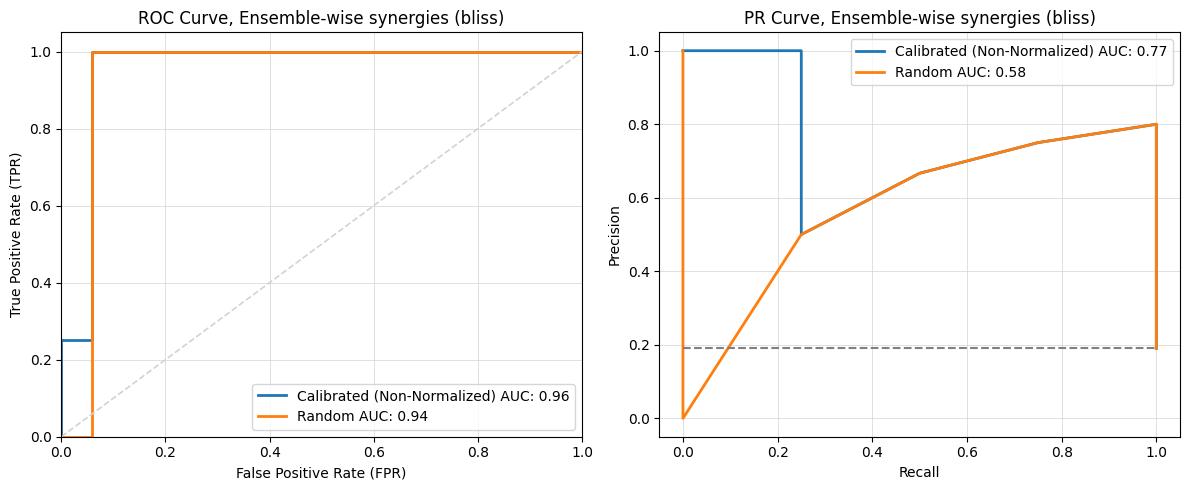

In [28]:
compare_two_simulations(boolean_models1=best_boolean_models_calibrated, boolean_models2=best_boolean_models_random, observed_synergy_scores=observed_synergy_scores,
                            model_outputs=model_outputs,perturbations=perturbations, synergy_method='bliss',label1='Calibrated (Non-Normalized)',
                            label2='Random', normalized=False, plot=True, save_result=False)

### Sampling

The `sampling_with_ci` function performs sampling on a list of Boolean models, calculates confidence intervals, and plots a Precision-Recall (PR) curve to assess the predictive performance in identifying synergistic drug combinations.

#### Parameters:

- `boolean_models`: A list of `BooleanModel` instances used for the sampling.

- `observed_synergy_scores`: A list of observed synergy scores.

- `model_outputs`: An instance of `ModelOutputs`.

- `perturbations`: An instance of `Perturbation`.

- `synergy_method` (optional): The method for assessing synergy. Options: `'hsa'` (Highest Single Agent) or  `'bliss'` (Bliss Independence). By default, `'bliss'`.

- `repeat_time` (optional): The number of times to repeat the sampling process. By defualt, `10`.

- `sub_ratio` (optional): The proportion of models to sample in each iteration. By defualt, `0.8`.

- `boot_n` (optional): The number of bootstrap iterations for calculating confidence intervals. By defualt, `1000`.

- `confidence_level` (optional): The confidence level used for the interval calculations. By defualt, `0.9`.

- `plot` (optional):  Whether to plot the PR curve. By defualt, `True`.

- `plot_discrete` (optional): Whether to plot discrete points instead of continuous line on the PR curve. By defualt, `False`.

- `save_result` (optional): Whether to save the results. By defualt, `True`.

- `with_seeds` (optional): Whether to use a fixed seed for reproducibility. By defualt, `True`.

- `seeds` (optional): The seed value to ensure reproducibility. By defualt, `42`.


In [29]:
from pydruglogics.statistics.Statistics import sampling_with_ci

2024-12-05 23:42:46,170 - INFO - 
Synergy scores (bliss):
2024-12-05 23:42:46,170 - INFO - PI-PD: -0.08004557291666681
2024-12-05 23:42:46,171 - INFO - PI-CT: 0.0037254050925926707
2024-12-05 23:42:46,172 - INFO - PI-BI: 0.02237533757716037
2024-12-05 23:42:46,173 - INFO - PI-PK: 0.016493055555555358
2024-12-05 23:42:46,173 - INFO - PI-AK: 0.06550564236111112
2024-12-05 23:42:46,174 - INFO - PI-5Z: -0.0360460069444446
2024-12-05 23:42:46,174 - INFO - PD-CT: 0.004036458333333437
2024-12-05 23:42:46,175 - INFO - PD-BI: 0.0037109375000000666
2024-12-05 23:42:46,176 - INFO - PD-PK: 0.11840277777777775
2024-12-05 23:42:46,176 - INFO - PD-AK: -0.041644965277777724
2024-12-05 23:42:46,177 - INFO - PD-5Z: 0.011414930555555647
2024-12-05 23:42:46,177 - INFO - CT-BI: -8.391203703683736e-05
2024-12-05 23:42:46,178 - INFO - CT-PK: 0.0029166666666667895
2024-12-05 23:42:46,178 - INFO - CT-AK: 0.0031510416666666874
2024-12-05 23:42:46,178 - INFO - CT-5Z: 0.004114583333333477
2024-12-05 23:42:46,179 

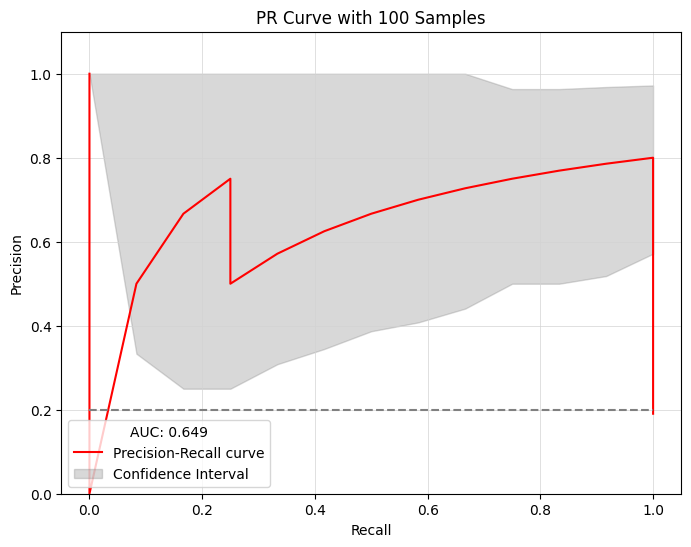

In [30]:
sampling_with_ci(boolean_models=best_boolean_models_calibrated, observed_synergy_scores=observed_synergy_scores, model_outputs=model_outputs, 
                 perturbations=perturbations,synergy_method='bliss', repeat_time=3, sub_ratio=0.8, boot_n=100, confidence_level= 0.95, 
                 plot=True, plot_discrete=False, save_result=False, with_seeds=True, seeds=42)